In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [5]:
class KMeans:
    def __init__(self, n_clusters=3, max_iterations=100, random_state=None):
        """
        Initialize KMeans clustering algorithm.

        Parameters:
        - n_clusters: Number of clusters (default is 3).
        - max_iterations: Maximum number of iterations (default is 100).
        - random_state: Seed for random number generation (default is None).
        """
        # Check if n_clusters is a positive integer
        if n_clusters <= 0:
            raise ValueError("n_clusters must be a positive integer.")

        self.n_clusters = n_clusters
        self.max_iterations = max_iterations
        self.random_state = random_state
        self.centroids = None
        self.labels = None

    def _initialize_centroids(self, data):
        """
        Initialize centroids by randomly selecting from current data points.

        Parameters:
        - data: Numpy array of shape (m, n)
            representing m data points in an n-dimensional space.
        """
        if self.random_state:
            np.random.seed(self.random_state)
        # randomly shuffle the indices of the data points
        random_indices = np.random.permutation(data.shape[0])
        # select the first n_clusters points as centroids
        self.centroids = data[random_indices[: self.n_clusters]]

    def _compute_distance(self, point, centroid):
        """
        Compute the Euclidean distance between a data point and a centroid.

        Parameters:
        - point: Numpy array representing a single data point.
        - centroid: Numpy array representing a single centroid.

        Returns:
        - distance: Euclidean distance between the point and the centroid.
        """
        return np.linalg.norm(point - centroid)

    def _find_closest_centroid(self, point):
        """
        Find the closest centroid to a given data point.

        Parameters:
        - point: Numpy array representing a single data point.

        Returns:
        - index: Index of the closest centroid in the centroids array.
        """
        distances = [
            self._compute_distance(point, centroid)
            for centroid in self.centroids
        ]
        return np.argmin(distances)

    def fit(self, data):
        """
        Fit the KMeans algorithm to the input data.

        Parameters:
        - data: Numpy array of shape (m, n)
            representing m data points in an n-dimensional space.
        """
        # Check if data is a 2D NumPy array
        if not isinstance(data, np.ndarray) or len(data.shape) != 2:
            raise ValueError("Input data must be a 2D NumPy array.")

        # Check if input data is numeric
        if not np.issubdtype(data.dtype, np.number):
            raise TypeError("Input data must be numeric.")

        # Check if the number of clusters is valid
        if self.n_clusters > data.shape[0]:
            raise ValueError(
                "Number of clusters cannot exceed the number of samples.")

        self._initialize_centroids(data)

        for _ in range(self.max_iterations):
            # Step 1: Assign points to the nearest centroid
            self.labels = np.array(
                [self._find_closest_centroid(point) for point in data]
            )

            # Step 2: Update centroids
            new_centroids = np.array(
                [data[self.labels == i].mean(axis=0)
                 for i in range(self.n_clusters)]
            )

            # Check for convergence (if centroids don't change)
            if np.all(new_centroids == self.centroids):
                break

            self.centroids = new_centroids

    def predict(self, data):
        """
        Assign data points to the nearest cluster based on current centroids.

        Parameters:
        - data: Numpy array of shape (m, n)
            representing m data points in an n-dimensional space.

        Returns:
        - labels: Array of cluster labels assigned to each data point.
        """
        if self.centroids is None:
            raise Exception("Model must be fitted before making predictions.")

        return np.array([self._find_closest_centroid(point) for point in data])

    def get_centroids(self):
        """
        Get the current centroids after fitting the algorithm.

        Returns:
        - centroids: Numpy array representing the centroids of clusters.
        """
        return self.centroids

---
## Test on a sample data


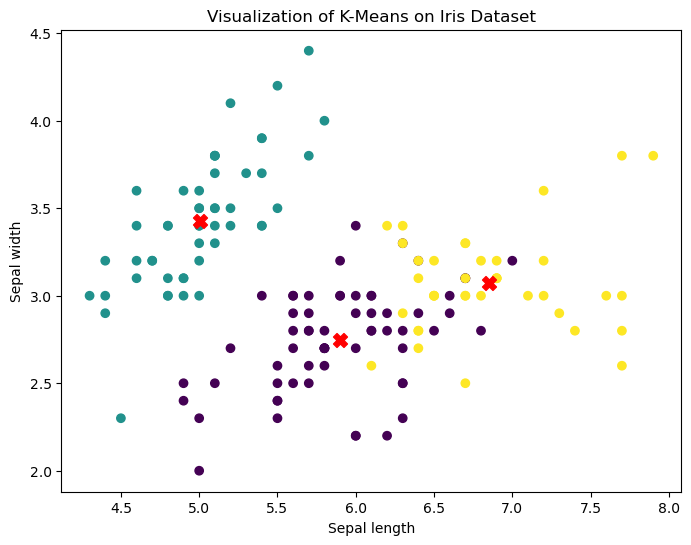

In [6]:
# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Use KMeans class to cluster the data
kmeans = KMeans(n_clusters=3, max_iterations=100, random_state=42)
kmeans.fit(X)
labels = kmeans.predict(X)
centroids = kmeans.get_centroids()

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="viridis", marker="o")
plt.scatter(centroids[:, 0], centroids[:, 1], c="red", marker="X", s=100)
plt.title("Visualization of K-Means on Iris Dataset")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.show()